# Autism Spectrum Disorder Classification

The aim of this project is to create a predictive model that classifies children, based on certain attributes, as either possessing autism or not.

Autism Spectrum Disorder (ASD) is a developmental condition that is characterized by social and cognitive impairment and often accompanied by repetitive behavior. According to the Johns Hopkins Bloomberg School of Public Health (JHBSPH), ASD has been on the rise since the 1960's and has reached a new height affecting 1 in every 59 children, aged 8, among 11  sites, in the United States, that were surveyed in 2014. This has been cited as a 15% increase from the rate discovered in 2002. An article on the latest report by the Centers for Disease Control (CDC), with contributions from the JHBSPH, on the matter can be found [here](https://www.jhsph.edu/news/news-releases/2018/us-autism-rate-edges-up-in-new-cdc-report.html).

Although there is no cure for ASD, early detection and rehabilitation has been shown to help children with the disorder improve their cognitive functions and learn the necessary social skills needed to lead a normal life. Yet, the diagnosis of ASD is not as cut-and-dry as some may think. ASD falls within a spectrum of varying degrees of severity. This introduces nuance and dificulty into the diagnosis of ASD. Currently, ASD is diagnosed based on multiple demographic as well as behavioral characteristics of the patient. Waiting times for an ASD diagnosis are lengthy and procedures can be costly. In order to increase the effectivness and efficiency of ASD diagnoses, new methods that make screenings more effective and easy to implement are necessary. Such a problem seems to be a ripe candidate for a machine learning solution. If one could collect the various attributes thought to contribute to ASD, then a statistical model may be able tease out the subtle patterns that connect all of the different cases of the disorder. This is the aim of this project: to be able to predict whether or not a certain patient possesses ASD. 

The data used in this analysis can be found [here](http://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++#), on the University of California, Irvine (UCI) Machine Learning Repository website. The data was originally collected by researcher Fadi Fayez Thabtah, of the Department of Digital Technology, from the Manukau Institute of Technology in Auckland, New Zealand. The dataset is composed of 20 features in total, 10 behavioural features and 10 charateristics relating to the individual being tested, of over 200 subjects from a wide variety of countries.

Click on a link below to jump to a particular step in the project: 

  * [Data Processing & Exploration](#Data-Processing-&-Exploration)
  
  * [Model Selection](#Model-Selection)
  
  * [Model Improvement](#Model-Improvement)
    
   * [Parameter Tuning](#Parameter-Tuning)
    
   * [Threshold](#Threshold)
   
  * [Conclusions](#Conclusions)

In [2]:
import pandas as pd
import arff, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold, LabelKFold
import warnings
import random
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_context("poster")
sns.set(style="darkgrid")

warnings.filterwarnings("ignore")

## Data Processing & Exploration

Let's begin by reading-in the data.

In [3]:
dataset = arff.load(open('Autism_Child_Data.arff', 'r'))
data = np.array(dataset['data'])
data_df = pd.DataFrame(data, columns = ["a1_score", "a2_score", "a3_score", "a4_score", "a5_score", "a6_score",
                                       "a7_score", "a8_score", "a9_score", "a10_score", "age", "gender", 
                                       "ethnicity", "jaundice", "autism", "country_of_res", "used_app_before",
                                       "result", "age_desc", "relation", "asd"])  

Below is a glossary of each feature and its meaning:
   * "a1_score" - Survey question 1 answer
   * "a2_score" - Survey question 2 answer
   * "a3_score" - Survey question 3 answer
   * "a4_score" - Survey question 4 answer
   * "a5_score" - Survey question 5 answer
   * "a6_score" - Survey question 6 answer
   * "a7_score" - Survey question 7 answer
   * "a8_score" - Survey question 8 answer
   * "a9_score" - Survey question 9 answer
   * "a10_score" - Survey question 10 answer
   * "age" -  Age of subject in years
   * "gender" -  Gender of subject
   * "ethnicity" -  Ethnicity of subject
   * "jaundice" -  Whether or not the subject was born with jaundice
   * "autism" - Whether any family member of the subject has had a pervasive developmental disorder (PPD)
   * "country_of_res" - Subject's country of residence
   * "used_app_before" - Whether the subject has used the screening application before
   * "result" - The final screening score obtained based on the scoring algorithm of the screening method used
   * "age_desc" - A description of the subject's age group
   * "relation" - The relationship of the person, completing the test, to the subject
   * "asd" - Whether or not the subject was diagnosed with ASD 

In [4]:
data_df.head(5)

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,asd
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,None,no,no,Jordan,yes,5,4-11 years,None,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,None,yes,no,Jordan,no,4,4-11 years,None,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [5]:
data_df.shape

(292, 21)

We have a total of 292 observations in the data and 21 features. Taking into consideration that this data is to be used for the purposes of making conclusions about the prevalence of ASD across multiple countries, 292 subjects does not seem to be a sufficient sample size in order to make conclusions across such a culturally and ethnically diverse subject sample. Any findings we uncover should be reported with caution. 

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
a1_score           292 non-null object
a2_score           292 non-null object
a3_score           292 non-null object
a4_score           292 non-null object
a5_score           292 non-null object
a6_score           292 non-null object
a7_score           292 non-null object
a8_score           292 non-null object
a9_score           292 non-null object
a10_score          292 non-null object
age                288 non-null object
gender             292 non-null object
ethnicity          249 non-null object
jaundice           292 non-null object
autism             292 non-null object
country_of_res     292 non-null object
used_app_before    292 non-null object
result             292 non-null object
age_desc           292 non-null object
relation           249 non-null object
asd                292 non-null object
dtypes: object(21)
memory usage: 48.0+ KB


In [7]:
data_df.describe()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,asd
count,292,292,292,292,292,292,292,292,292,292,288.0,292,249,292,292,292,292,292.0,292,249,292
unique,2,2,2,2,2,2,2,2,2,2,8.0,2,10,2,2,52,2,11.0,1,5,2
top,1,1,1,1,1,1,1,0,0,1,4.0,m,White-European,no,no,United Kingdom,no,8.0,4-11 years,Parent,NO
freq,185,156,217,161,217,208,177,147,148,212,92.0,208,108,212,243,49,281,44.0,292,214,151


In [8]:
# We will replace the missing values in 'age' with '4.0', the value that occurs most often in the column

data_df['age'] = data_df['age'].fillna(4)

# Replacing 'self' with 'Self' in the 'relation' column 

data_df.loc[data_df['relation'] == 'self', 'relation'] = 'Self'

# We will also remove the 'age_desc' column as the entire column possesses only a single value

data_df = data_df.drop(['age_desc'], axis=1)

In [9]:
# Function to create a histogram
sns.set(font_scale = 1.5)
def make_histogram(val_counts, title = '', xlab = '', ylab = '', x_rotate = 'horizontal', color = 'dodgerblue'):
    plt.figure(figsize=(12,8))
    sns.barplot(val_counts.index, val_counts.values, alpha=0.8, color= color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.xticks(rotation = x_rotate)
    plt.show();

In [10]:
# Value counts for each interesting feature
age_counts = (data_df['age'].value_counts(normalize=True)*100)

gender_counts = (data_df['gender'].value_counts(normalize=True)*100)  # all data
gender_counts_asd = (data_df[data_df['asd'] == 'YES']['gender'].value_counts(normalize=True)*100) # only observations positive for ASD

ethnicity_counts = (data_df['ethnicity'].value_counts(normalize=True)*100)
ethnicity_counts_asd = (data_df[data_df['asd'] == 'YES']['ethnicity'].value_counts(normalize=True)*100)

jaundice_counts = (data_df['jaundice'].value_counts(normalize=True)*100)
jaundice_counts_asd = (data_df[data_df['asd'] == 'YES']['jaundice'].value_counts(normalize=True)*100)

autism_counts = (data_df['autism'].value_counts(normalize=True)*100)
autism_counts_asd = (data_df[data_df['asd'] == 'YES']['autism'].value_counts(normalize=True)*100)

result_counts = (data_df['result'].value_counts(normalize=True)*100)
result_counts_asd = (data_df[data_df['asd'] == 'YES']['result'].value_counts(normalize=True)*100)

asd_counts = (data_df['asd'].value_counts(normalize=True)*100)

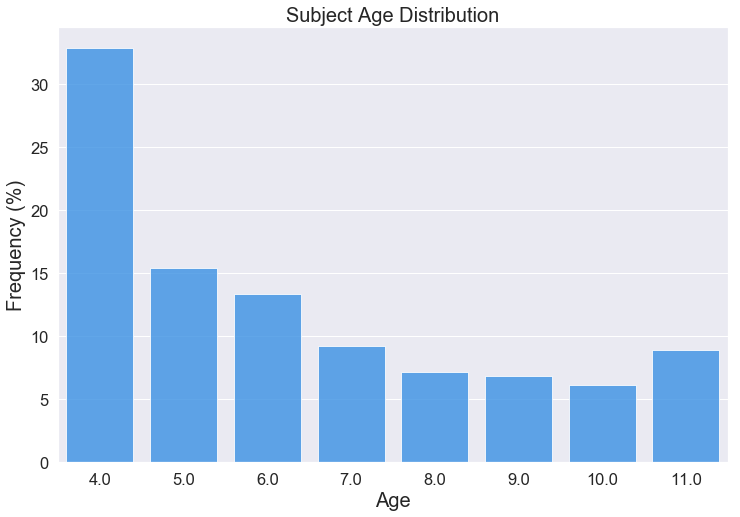

In [11]:
make_histogram(age_counts, 'Subject Age Distribution', 'Age', 'Frequency (%)')

We have a positively skewed distribution of age. Here, we see that most of the subjects are 6 years of age or younger with a decrease in the number of subjects in each successive age group. 

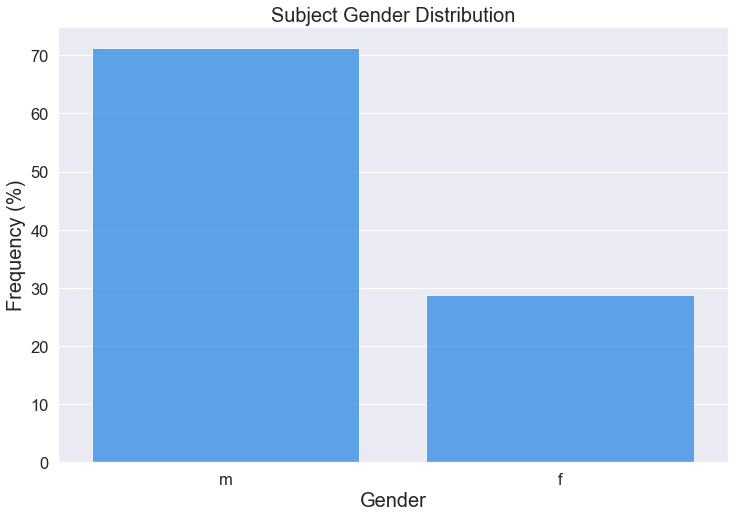

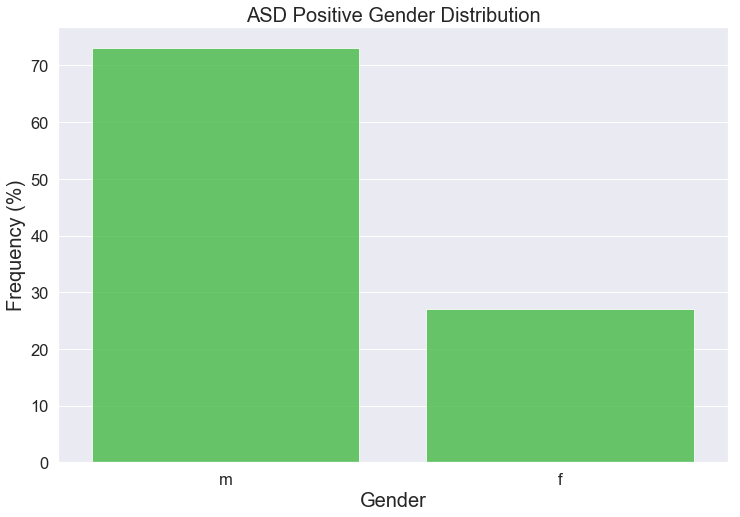

In [12]:
make_histogram(gender_counts, 'Subject Gender Distribution', 'Gender', 'Frequency (%)')
make_histogram(gender_counts_asd, 'ASD Positive Gender Distribution', 'Gender', 'Frequency (%)', color = 'limegreen')

70% of the subjects are male compared to 30% female. Although it is unclear whether this gender distribution was made on purpose, it would make sense that a larger proportion of subjects are boys as males tend to be at a higher risk, statistically, of having ASD than do females. The second graph shows us the distribution of gender among those subjects that were eventually diagnosed with ASD. Although we see that a greater proportion of the subjects positive for ASD are male than female, by a large margin, this may simply be an artifact of the general gender distribution. For a concrete conclusion, as to whether the rate of ASD is larger mong boys versus girls, the analysis would need to be repeated with a balanced number of male and female subjects.

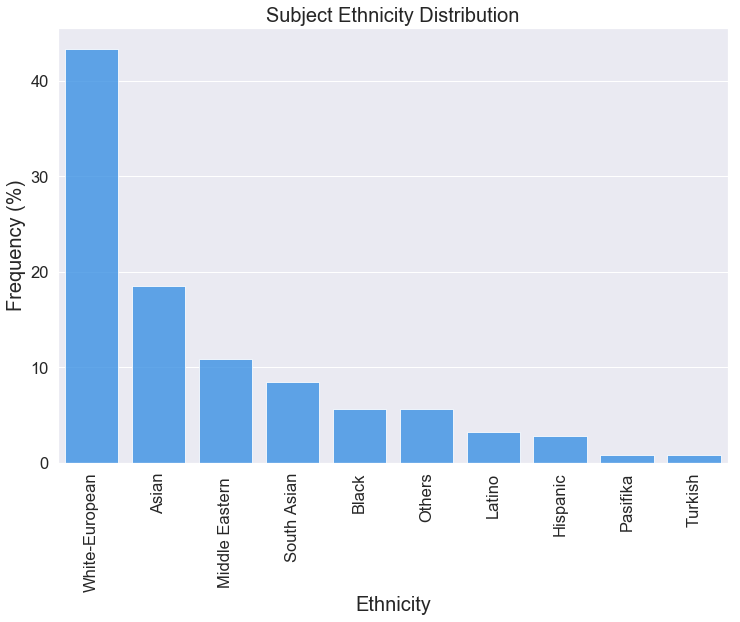

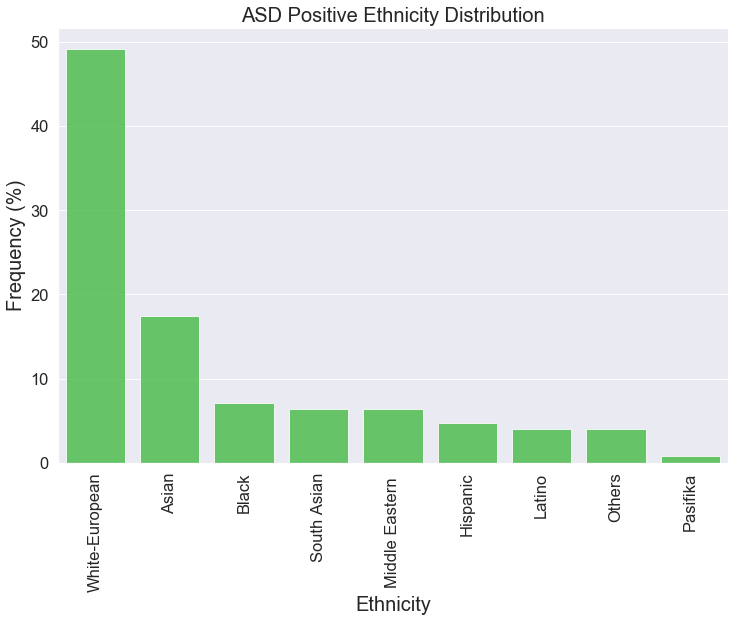

In [14]:
make_histogram(ethnicity_counts, 'Subject Ethnicity Distribution', 'Ethnicity', 'Frequency (%)', 'vertical')
make_histogram(ethnicity_counts_asd, 'ASD Positive Ethnicity Distribution', 'Ethnicity', 'Frequency (%)', 'vertical', color = 'limegreen')

Looking at the two graphs above, over 40% of subjects, with ASD, are of 'White-European' ethnicity, followed by 'Asian' and 'Black' subjects. This may tell us more about the way the survey was conducted than the potential "ethnic bias" of ASD as the first graph shows how, similarly, over 40% of the total subjects are of 'White-European' descent. Although, it seems as if there is a greater proportion of 'Black' subjects with ASD than 'Middle Eastern' subjects despite there being ~5% more 'Middle Eastern' subjects in the dataset than 'Black' subjects. 

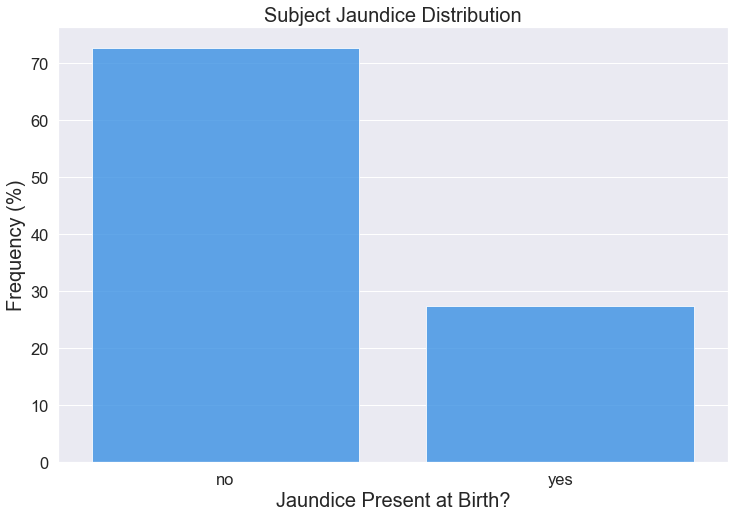

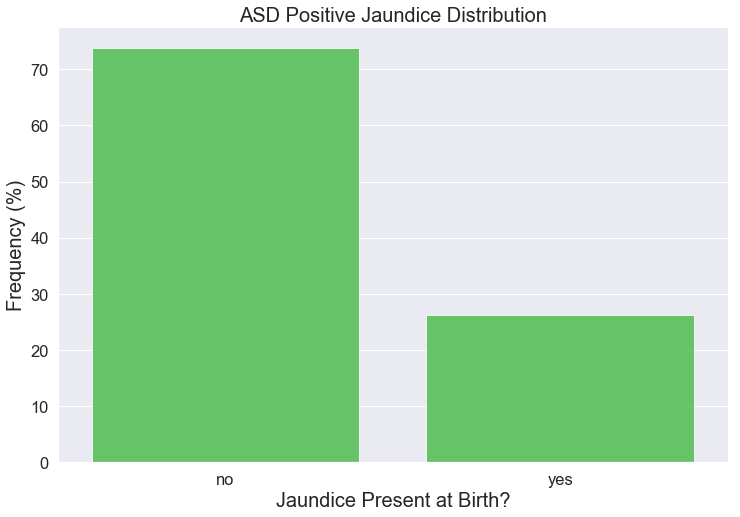

In [15]:
make_histogram(jaundice_counts, 'Subject Jaundice Distribution', 'Jaundice Present at Birth?', 'Frequency (%)')
make_histogram(jaundice_counts_asd, 'ASD Positive Jaundice Distribution', 'Jaundice Present at Birth?', 'Frequency (%)', color = 'limegreen')

Over 70% of subjects did not present with jaundice at the time of birth. A similar finding is made among does subjects diagnosed with ASD. Although this may, again, be an artifact of the overall distribution, we would still expect to see a significant change in the distribution if jaundice were in fact an indicator of ASD. For this reason, it is reasonable to infer that jaundice may have no correlation with the presence of ASD. 

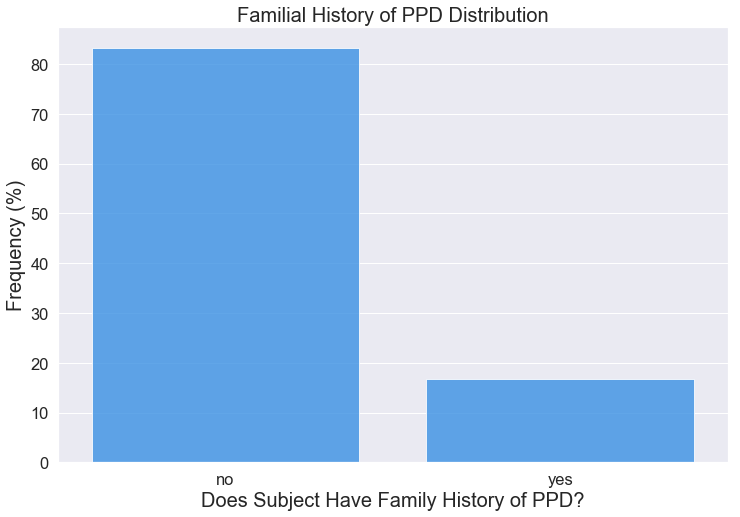

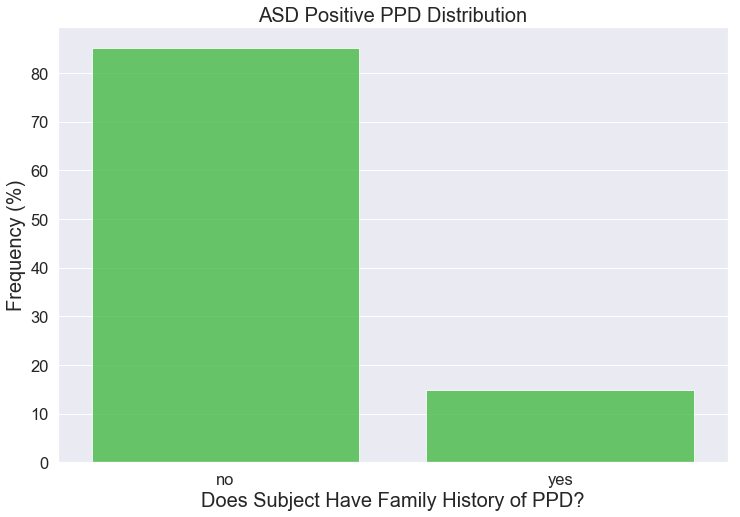

In [16]:
make_histogram(autism_counts, 'Familial History of PPD Distribution', 'Does Subject Have Family History of PPD?', 'Frequency (%)')
make_histogram(autism_counts_asd, 'ASD Positive PPD Distribution', 'Does Subject Have Family History of PPD?', 'Frequency (%)', color = 'limegreen')


A vast majority of subjects, over 80%, do not have a family history of PPD and an even higher percentage of subjects with ASD do not possess a family history of PPD. Once again, it is safe to infer that a family history of PPD may have no correlation with the presence of ASD. 

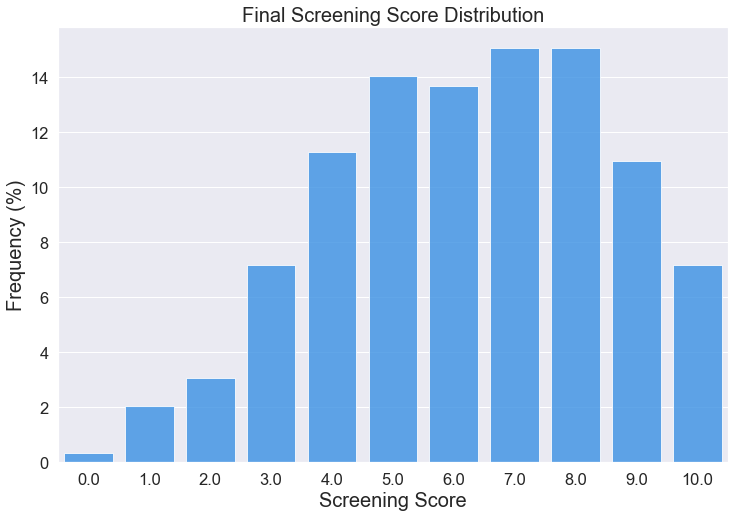

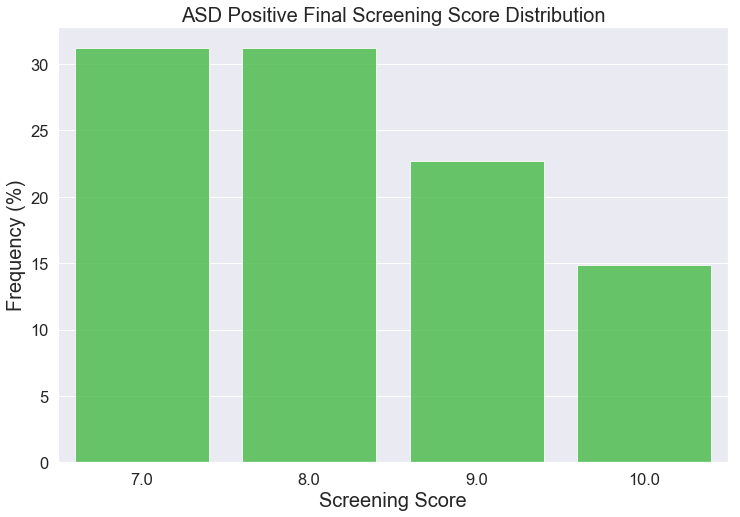

In [17]:
make_histogram(result_counts, 'Final Screening Score Distribution', 'Screening Score', 'Frequency (%)')
make_histogram(result_counts_asd, 'ASD Positive Final Screening Score Distribution', 'Screening Score', 'Frequency (%)', color = 'limegreen')

The distribution of the screening score amongst subjects is largely normal with a slight negative skew. Most of the subjects recieve a screening score between 4 and 9. Although, it seems as if all subjects diagnosed with ASD recieve screening scores of 7 and above. The screening score seems to be the best predictor of ASD so far, perfectly seperating subjects with and without ASD. Still, we must consider the possibility that health professionals may use the screening test solely for the purposes of diagnosing ASD. The inclusion of the screening score would defeat the purpose of a predictive model since, if the goal were to predict whether or not a subject possesses ASD before they are diagnosed, or administered the screening test, then the screening score would not be available. Based on documentation of the dataset, it is unclear how much weight health professionals put on the screening score for the diagnosis of ASD. We will keep this in mind throught the analysis. 

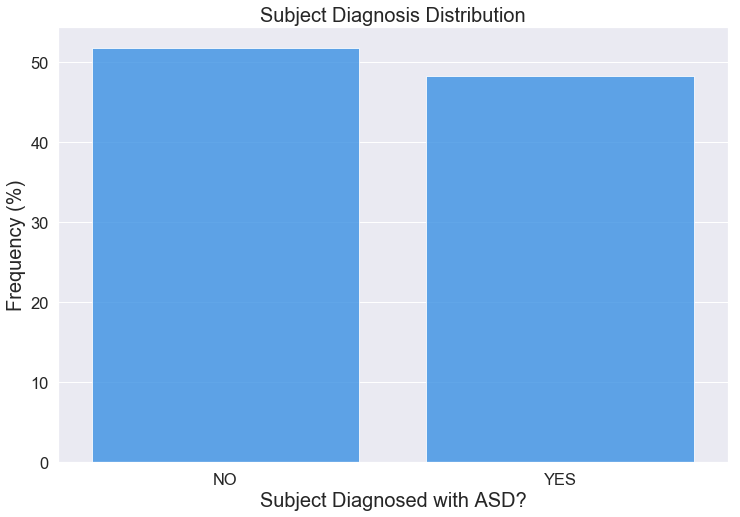

In [18]:
make_histogram(asd_counts, 'Subject Diagnosis Distribution', 'Subject Diagnosed with ASD?', 'Frequency (%)')

The distribution of our predictor variable, 'asd', seems to be uniform. Roughly half of the subjects wee diagnosed with ASD while the other half were not. Although, there is a slightly lower number of subjects that were concluded to possess ASD than not. This is preferable as such a balanced dataset will spare us from the complications that appear as a result of an unbalanced predictor variable in the data.

## Model Selection

Now that we have an idea of the structre of our dataset, we'll continue by selecting the statistical model that we will improve and, eventually, use as our final model. We will first build 3 diferent base models and, based on their performances, we will select one method to continue with. The algorithms that will be used include Logistic Regression, Random Forest, and Naive Bayes. These models have proven to be successful in many clasification problems before and should be sufficient for our purposes as well.

As we have discussed earlier, the 'result' feature seems to perfectly predict our dependent variable. To make it more difficult on our model, we will exclude 'result' from the training set hereby assuming that we do not possess screening scores at the time of prediction. 

In [19]:
# Creating dummy variables for all categorical features

age = pd.get_dummies(data_df['age'], drop_first = True)
gender = pd.get_dummies(data_df['gender'], drop_first = True)
ethnicity = pd.get_dummies(data_df['ethnicity'], drop_first = True)
jaundice = pd.get_dummies(data_df['jaundice'], drop_first = True)
autism = pd.get_dummies(data_df['autism'], drop_first = True)
country_of_res = pd.get_dummies(data_df['country_of_res'], drop_first = True)
used_app_before = pd.get_dummies(data_df['used_app_before'], drop_first = True)
result = pd.get_dummies(data_df['result'], drop_first = True)
relation = pd.get_dummies(data_df['relation'], drop_first = True)

scores = data_df[['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score', 'a7_score', 'a8_score', 
                  'a9_score', 'a10_score']]
model_data = pd.concat([scores, age, gender, ethnicity, jaundice, autism, country_of_res, used_app_before, 
                       relation, data_df['asd']], axis = 1)

In [20]:
# Creating a train-test split

x = model_data.drop(['asd'], axis=1)
y = model_data['asd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2018)

In [21]:
# A function that will compute a custom confusion matrix and relative values

def conf_matrix(ytest, predictions):
    TN = confusion_matrix(ytest,predictions)[0][0] # true negative
    FP = confusion_matrix(ytest,predictions)[0][1] # false positive
    FN = confusion_matrix(ytest,predictions)[1][0] # false negative
    TP = confusion_matrix(ytest,predictions)[1][1] # true positive
    N = TN + FN # total negative preds.
    P = TP + FP # total positive preds.

    conf_data = [['Error rate',((FP+FN)/(N+P))*100], 
                 ['Accuracy',((TP+TN)/(N+P))*100], 
                 ['Sensitivity',(TP/(TP+FN))*100], 
                 ['Specificity',(TN/(TN+FP))*100], 
                 ['Precision',(TP/P)*100],
                 ['False Positive Rate',(FP/(TN+FP))*100]]
    
    unique_label = np.unique(ytest)

    print(pd.DataFrame(confusion_matrix(ytest, predictions, labels = unique_label), 
                       index=['True:{:}'.format(x) for x in unique_label], 
                       columns=['Pred:{:}'.format(x) for x in unique_label]))

    conf_df = pd.DataFrame(conf_data, columns=['Metric','Percent'], dtype=float)
    conf_df['Percent'] = round(conf_df['Percent'], 2)
    pd.set_option('display.max_colwidth', 500)
    print('\n', conf_df);
          

In [22]:
# Setting parameters for cross-validation

cv = StratifiedKFold(y_train, 5, random_state=2018) 

In [23]:
# Logistic Regression

# Fitting the model:

lm = LogisticRegression()
lm.fit(x_train, y_train)

# Predicting test set results:

predictions = lm.predict(x_test)

# Evaluating model via cross-validation:

lm_train_acc = cross_val_score(lm, x_train, y_train, cv = cv, scoring = 'accuracy')
print("Average Train Accuracy: ",lm_train_acc.mean())

# Evaluating model via test set:

print("\n")
conf_matrix(y_test, predictions)

Average Train Accuracy:  0.9183163737280295


          Pred:NO  Pred:YES
True:NO        26         2
True:YES        2        29

                 Metric  Percent
0           Error rate     6.78
1             Accuracy    93.22
2          Sensitivity    93.55
3          Specificity    92.86
4            Precision    93.55
5  False Positive Rate     7.14


In [24]:
# Random Forest

#Fitting the model:

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

#Predicting test set results:

predictions = rfc.predict(x_test)

# Evaluating model via cross-validation:

rfc_train_acc = cross_val_score(rfc, x_train, y_train, cv = cv, scoring = 'accuracy')
print("Average Train Accuracy: ",rfc_train_acc.mean())

#Evaluating model accuracy:

print("\n")
conf_matrix(y_test, predictions)


Average Train Accuracy:  0.8967622571692877


          Pred:NO  Pred:YES
True:NO        26         2
True:YES        7        24

                 Metric  Percent
0           Error rate    15.25
1             Accuracy    84.75
2          Sensitivity    77.42
3          Specificity    92.86
4            Precision    92.31
5  False Positive Rate     7.14


In [25]:
# Naive Bayes

#Fitting the model:

bayes = GaussianNB()
bayes.fit(x_train, y_train)

#Predicting test set results:

predictions = bayes.predict(x_test)

# Evaluating model via cross-validation:

bayes_train_acc = cross_val_score(bayes, x_train, y_train, cv = cv, scoring = 'accuracy')
print("Average Train Accuracy: ",bayes_train_acc.mean())

#Evaluating model accuracy:

print("\n")
conf_matrix(y_test, predictions)

Average Train Accuracy:  0.695004625346901


          Pred:NO  Pred:YES
True:NO        23         5
True:YES       17        14

                 Metric  Percent
0           Error rate    37.29
1             Accuracy    62.71
2          Sensitivity    45.16
3          Specificity    82.14
4            Precision    73.68
5  False Positive Rate    17.86


Because our dependent variable, 'asd', the subjects' diagnoses, is nicely balanced, using accuracy as our primary metric of model comparison will suffice. Above, we see that according to the accuracy, the logistic regression came out on top with a test accuracy of 93.22%. Better yet, we see that the model also predicts both 'YES' and 'NO' equally well with both cases being predicted correctly 93-94% of the time. Furthermore, because our dataset is so small, it is wise to perform an evaluation using cross-validation to obtain an average performance of each model on different samples of the training set. Once again, logistic regression comes out on top with an average training accuracy of ~92%.

Let's continue by improving the prediction of the logistic regression further.

## Model Improvement

The following are a few ways we can further improve our model:
   * Feature Engineering
   * Parameter Tuning
   * Ensemble Models
   
For our logistic model, we are constrained by the features already provided for us and our current model performs so well that creation of an esemble model is unnecessary. Although our model possesses only one parameter, C, we can utilize a grid search to determine the optimal value that will maximize our model's performance.

Furthermore, although it is not necessarily improving model performance, we can tweak the threshold of the model to either better predict positive or negative cases as we see fit.

### Parameter Tuning

In [26]:
# Instantiating the gird search

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lm_cv = GridSearchCV(LogisticRegression(), param_grid)
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = cv, verbose = 2, scoring = 'accuracy')

In [27]:
%%capture

#Fit the grid search to data
grid_search.fit(x_train, y_train);

In [28]:
# Print best hyperparameter value
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

It looks like our optimal C value is 100. Let's recreate the logistic regression model using this value and determine how its performance changes.

In [29]:
# Final Model

# Fitting the model:

lm_final = LogisticRegression(C = 100)
lm_final.fit(x_train, y_train)

# Predicting test set results:

predictions_final = lm_final.predict(x_test)

# Evaluating model via cross-validation:

lm_final_train_acc = cross_val_score(lm_final, x_train, y_train, cv = cv, scoring = 'accuracy')
print("Average Train Accuracy: ",lm_final_train_acc.mean())

# Evaluating model via test set:

print("\n")
conf_matrix(y_test, predictions_final)

Average Train Accuracy:  0.9396854764107309


          Pred:NO  Pred:YES
True:NO        25         3
True:YES        3        28

                 Metric  Percent
0           Error rate    10.17
1             Accuracy    89.83
2          Sensitivity    90.32
3          Specificity    89.29
4            Precision    90.32
5  False Positive Rate    10.71


It seems as if the sensitivity and specificity have both decreased while the average train accuracy has increased. Let's tamper with the threshold value of the logistic regression to see if we can bring the sensitivity, and/or specificity, back up.

### Threshold

Reciever Operating Characteristic (ROC) curves are frequently used to show the connection between the true positive and false positive rates for every possible cut-off, or threshold, for a model. This threshold dictates at what percent of certainty a model should finalize a 'positive' classification. The default threshold for a model is often 0.5 or 50% certainty. In addition, the area under an ROC curve, abreviated as the 'AUC', is a measure of the usefulness of a model in general; and so, the areas under ROC curves are used to compare the usefulness of models. Every point on the ROC curve represents a chosen threshold even though you cannot see this value on the graph it self.

The selection of a threshold value is arbitrary and almost totally dictated by the goal of the analysis or purpose of the model. Careful consideration must be taken to determine what is considered an 'acceptable' trade-off in terms of model results. For our case, we'll assume that it is more favorable to falsely predict that a person has ASD, than it is to falsely predict that a person does not have ASD. This decision translates to the preference of a higher sensitivity over a higher specificity and, similarly, a higher true positive rate in exchange for a slightly higher false positive rate.

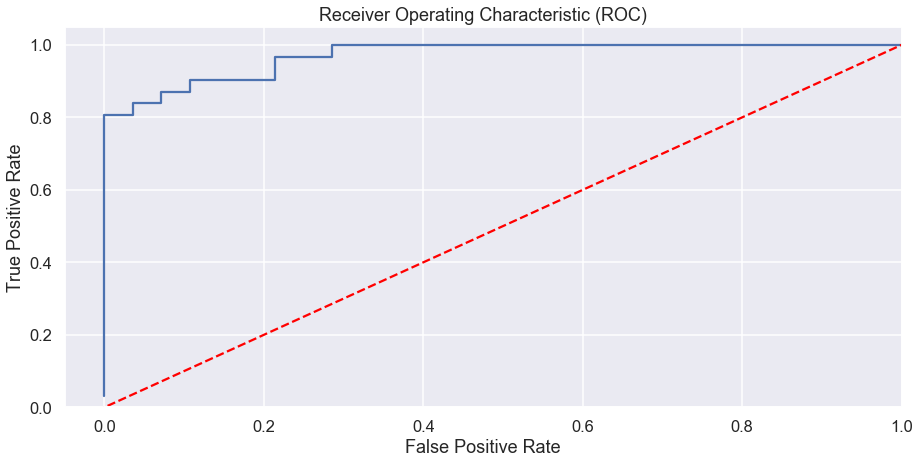

AUC:  0.9700460829493087


In [30]:
lm_final.fit(x_train, y_train)
pred = lm_final.predict_proba(x_test)[:, 1]
test = y_test.replace({"NO": 0, "YES": 1})

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test, pred, pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize = (15,7))
sns.set_context("talk")
plt.plot(fpr[1], tpr[1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot([-3, 3], [-3, 3], ls="--", c=".3", color = "red")
plt.show()
print("AUC: ", roc_auc_score(test, pred))

An AUC value of 0.97 reinforces our confidence in our model as a 'perfect classifier' would possess an AUC score of 1.

In [31]:
display(tpr[1]) # y-values
display(fpr[1]) # x-values

array([0.03225806, 0.80645161, 0.80645161, 0.83870968, 0.83870968,
       0.87096774, 0.87096774, 0.90322581, 0.90322581, 0.96774194,
       0.96774194, 1.        , 1.        ])

array([0.        , 0.        , 0.03571429, 0.03571429, 0.07142857,
       0.07142857, 0.10714286, 0.10714286, 0.21428571, 0.21428571,
       0.28571429, 0.28571429, 1.        ])

Let's now extrapolate the best combination of true and false positive rates. We'd like to maximize the true positive rate while maintaining a relativley low false positive rate. Based on the ROC curve and point coordinates, it seems as if a true positive rate of 0.903 and false positive rate of 0.107 provides us with an ideal combination. We will also test a true positive rate of 0.968 and false positive rate of 0.214 in an attempt to improve the sensitivity even further. We'll now infer what thresholds produce such combinations.

In [32]:
def thresh_predict(threshold = 0.5, prob_preds = ''):
    threshold = threshold
    thresh_pred = pd.Series(prob_preds).replace(' ', '')
    thresh_pred[thresh_pred > threshold] = 'YES'
    thresh_pred[thresh_pred != 'YES'] = 'NO'
    return(thresh_pred);

In [33]:
# Model performance with a threshold of 0.5
co_fifty = thresh_predict(prob_preds = pred)
conf_matrix(y_test, co_fifty)

          Pred:NO  Pred:YES
True:NO        25         3
True:YES        3        28

                 Metric  Percent
0           Error rate    10.17
1             Accuracy    89.83
2          Sensitivity    90.32
3          Specificity    89.29
4            Precision    90.32
5  False Positive Rate    10.71


In [34]:
# Model performance with a threshold of 0.1
co_ten = thresh_predict(0.1, prob_preds = pred)
conf_matrix(y_test, co_ten)

          Pred:NO  Pred:YES
True:NO        22         6
True:YES        1        30

                 Metric  Percent
0           Error rate    11.86
1             Accuracy    88.14
2          Sensitivity    96.77
3          Specificity    78.57
4            Precision    83.33
5  False Positive Rate    21.43


Above, we have two confusion matrices. The first mirroring the results of our final model with a threshold of 0.5 while the second reflects the performance of the same model but with a threshold of 0.1. Here we see that by lowering the threshold from 0.5 to 0.1, we have increased the sensitivity from 90.32% to 96.77% but simultaneously decreased the specificity and accuracy as a result as well. However, what we've done is manipulate the results of our model, to our specifications, on a single test set. There is no way of telling how the model will perform when such a threshold is applied to different test sets. The cros_val_score() function does not allow for the setting of a custom threshold. So, cross-validation will need to be simulated, and an average training accuracy calculated manually as well.

In [35]:
# A function that will create a cross-validation generator object and perform psuedo cross-validation on the folds of 
# the object using a logistic regression model and outputing the average accuracy of all the models that were fit.

def manual_log_cv(xtrain = '', ytrain = '', nfolds = 5, C = 100, threshold = 0.5):
    
    random.seed(2018)
    
    x_train = xtrain.reset_index(drop=True)
    y_train = ytrain.reset_index(drop=True)
    x_train['cv_label'] = x_train.index
    cv_labels = x_train['cv_label']
    lkf = LabelKFold(cv_labels, n_folds=nfolds)
    x_train = x_train.drop(['cv_label'], axis=1)

    lm = LogisticRegression(C = C)
    accs = []
    for train, test in lkf:
        lm_cv = lm.fit(x_train.loc[train], y_train.loc[train]) 
        pred = lm_cv.predict_proba(x_train.loc[test])[:, 1]
        thresh_pred = thresh_predict(threshold, prob_preds = pred)
        acc = accuracy_score(y_train.loc[test], thresh_pred)
        accs.append(acc)

    print("Average Train Acuracy (threshold =", threshold, "):", (sum(accs)/5));

In [36]:
manual_log_cv(xtrain = x_train, ytrain = y_train, nfolds = 5, C = 100, threshold = 0.5)
manual_log_cv(xtrain = x_train, ytrain = y_train, nfolds = 5, C = 100, threshold = 0.1)

Average Train Acuracy (threshold = 0.5 ): 0.922664199814986
Average Train Acuracy (threshold = 0.1 ): 0.9013876040703053


After performing some manual cross-validation, we see that the model performs better at a threshold of 0.5 than 0.1 with an average accuracy of 92.3% compared to 90.1%, respectively. Yet, these performances are lower, still, than the one obtained when cross-validation was performed on the optomized model without tinkering with the threshold; ~94%. Any differences in accuracies that we observe between, seemingly, identical models are likely due to differing random splits of the training data during cross-validation. 

Since a threshold of 0.5 has provided us with the highest model performance on our test set, as well as cross validated training set, the threshold of the final logistic regression model should not deviate away from this deafult of 0.5. 

## Conclusions

The table below compares model metrics between the base, optomized, and final logistic regression models: 

|   LR Model    | Avg. Train Accuracy (%) |     Test Accuracy (%)    | Test Sensitivity (%)  | Test Specificity (%) |
|---------------|-------------------------|--------------------------|-----------------------|----------------------|
|   Base        |         91.83           |         93.22            |         93.55         |         92.86        |
|   Final       |         93.97           |         89.83            |         90.32         |         89.29        |

NOTE: The final model is an iteration of the optomized model in which the threshold value is 0.5

According to our table above, the final model exhibits a higher average cross-validation, train, accuracy than the base logistic regression model. Although, this seems to have been accompanied by a decrease in all other test set based metrics across the board. Test set metrics are based on the model's performance using a single test set while the average train accuracy is calculated via cross-validation, using the average accuracy across multiple train-test splits of the training data. For this reason, one should be inclined towards applying a greater emphasis on the model's average train accuracy as oppose to the test accuracy.

And so, the best model for the predictive classification of ASD is a logistic regression model with a C value of 100 and a threshold value of 0.5. Let's analyze the importances of the model features.

In [37]:
# Grabbing the feature importances as determined by the final model

coeffs = lm_final.coef_[0]
top_three = np.argpartition(coeffs, -3)[-3:]
print(x.columns[top_three])

Index(['a5_score', 'a4_score', 'a10_score'], dtype='object')


Based on an analysis of the model coefficients, it seems as if 'a5_score', 'a4_score' and 'a10_score' have the greatest influence during observation classification. In other words, the answers to these three survey questions seem to play the biggest role in the prediction of ASD. 

Further analysis and research on this subject may include the collection of additional data and subject features. Additional observations would allow for more accurate measures of model performance while additional features could increase model performance by providing additional information that explains the varaince between the observations. Finally, documentation of the data should be improved by providing motivations for the different features that have been collected. Without definite knowledge of the origin and intended purpose of each feature, the process of creating a practical predictive model becomes muddied as the model's goal is not clearly defined leading one to potentially include features in the model that would not be available during times when prediction is required.